# Import

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.0     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data = read.csv("Data/data.csv")
df = data[-1]

In [3]:
df$Generation <- factor(df$Generation)
str(df)

'data.frame':	800 obs. of  12 variables:
 $ Name      : Factor w/ 800 levels "Abomasnow","AbomasnowMega Abomasnow",..: 81 330 746 747 103 104 100 101 102 666 ...
 $ Type.1    : Factor w/ 18 levels "Bug","Dark","Dragon",..: 10 10 10 10 7 7 7 7 7 18 ...
 $ Type.2    : Factor w/ 19 levels "","Bug","Dark",..: 15 15 15 15 1 1 9 4 9 1 ...
 $ Total     : int  318 405 525 625 309 405 534 634 634 314 ...
 $ HP        : int  45 60 80 80 39 58 78 78 78 44 ...
 $ Attack    : int  49 62 82 100 52 64 84 130 104 48 ...
 $ Defense   : int  49 63 83 123 43 58 78 111 78 65 ...
 $ Sp..Atk   : int  65 80 100 122 60 80 109 130 159 50 ...
 $ Sp..Def   : int  65 80 100 120 50 65 85 85 115 64 ...
 $ Speed     : int  45 60 80 80 65 80 100 100 100 43 ...
 $ Generation: Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Legendary : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...


# Manipulating factors

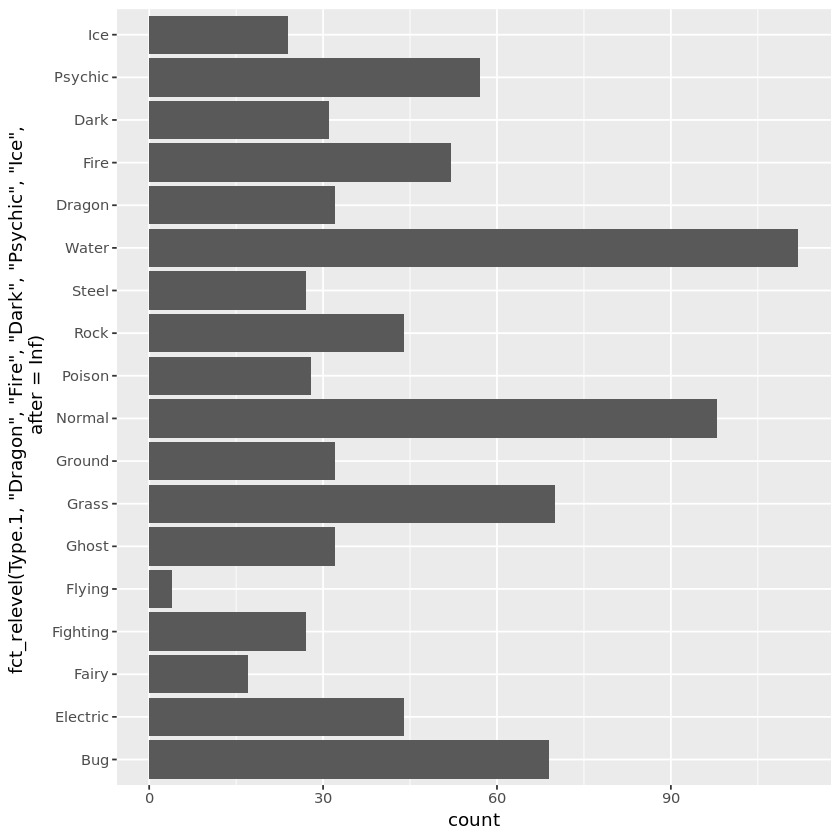

In [18]:
# manual reordering factors
ggplot(df, aes(x=fct_relevel(Type.1, "Dragon", "Fire", "Dark", "Psychic", "Ice", after=Inf))) + 
geom_bar()+
coord_flip()

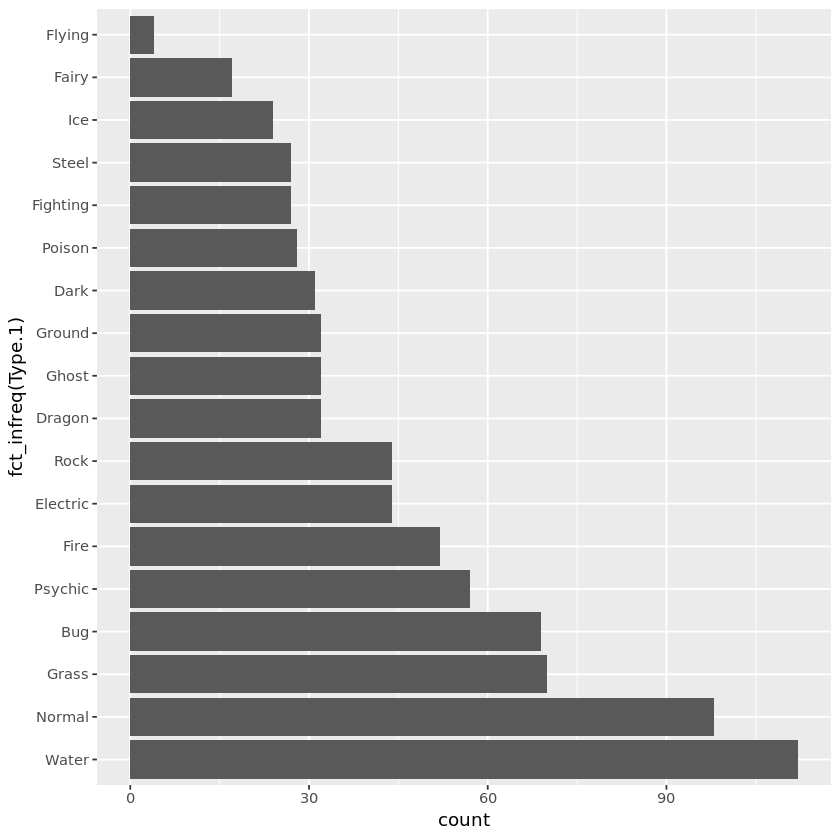

In [32]:
# reordering by frequency
ggplot(df, aes(x=fct_infreq(Type.1))) + 
geom_bar()+
coord_flip()

In [15]:
df %>%
pull(Type.1) %>%
fct_relevel("Dark", "Dragon", "Fire", after=3) %>%
levels()

[1] "Bug"      "Electric" "Fairy"    "Dark"     "Dragon"   "Fire"    
 [7] "Fighting" "Flying"   "Ghost"    "Grass"    "Ground"   "Ice"     
[13] "Normal"   "Poison"   "Psychic"  "Rock"     "Steel"    "Water"

In [42]:
# renaming levels
df %>%
pull(Legendary) %>%
fct_recode("Normal" = "False", "Legendary" = "True") %>%
table()

.
   Normal Legendary 
      735        65 

In [33]:
levels(df$Type.1)

[1] "Bug"      "Dark"     "Dragon"   "Electric" "Fairy"    "Fighting"
 [7] "Fire"     "Flying"   "Ghost"    "Grass"    "Ground"   "Ice"     
[13] "Normal"   "Poison"   "Psychic"  "Rock"     "Steel"    "Water"

In [36]:
# collapsing factors levels
df %>%
pull(Type.1) %>%
fct_collapse(other = c("Normal", "Bug", "Fighting", "Flying"),
            elemental = c("Electric", "Fire", "Water", "Grass", "Ici"),
            darkness = c("Dark", "Ghost", "Psychic", "Poison"),
            rock = "Steel", "Rock", "Ground") %>%
levels()

Warning message:
“Unknown levels in `f`: Ici”

[1] "other"     "darkness"  "Dragon"    "elemental" "Fairy"     ""         
[7] "Ice"       "rock"

In [41]:
# collapsing in a other category
fct_other(df$Type.1, keep = c("Dragon", "Fire")) %>%
table()

.
Dragon   Fire  Other 
    32     52    716 

In [43]:
# collapsing in a other category
fct_other(df$Type.1, drop = c("Normal", "Bug")) %>%
table()

.
    Dark   Dragon Electric    Fairy Fighting     Fire   Flying    Ghost 
      31       32       44       17       27       52        4       32 
   Grass   Ground      Ice   Poison  Psychic     Rock    Steel    Water 
      70       32       24       28       57       44       27      112 
   Other 
     167 

In [47]:
# collapsing to keep only a given % of levels
fct_lump(df$Type.1, prop = 0.05) %>%
table()

fct_lump(df$Type.1, n=5, other_level = "small") %>%
table()

.
     Bug Electric     Fire    Grass   Normal  Psychic     Rock    Water 
      69       44       52       70       98       57       44      112 
   Other 
     254 

.
    Bug   Grass  Normal Psychic   Water   small 
     69      70      98      57     112     394 

# Tidying data

In [67]:
df %>%
select(contains("Type"))%>%
filter(!is.na(x=Type.2)) %>%
head()

Type.1,Type.2
Grass,Poison
Grass,Poison
Grass,Poison
Grass,Poison
Fire,
Fire,


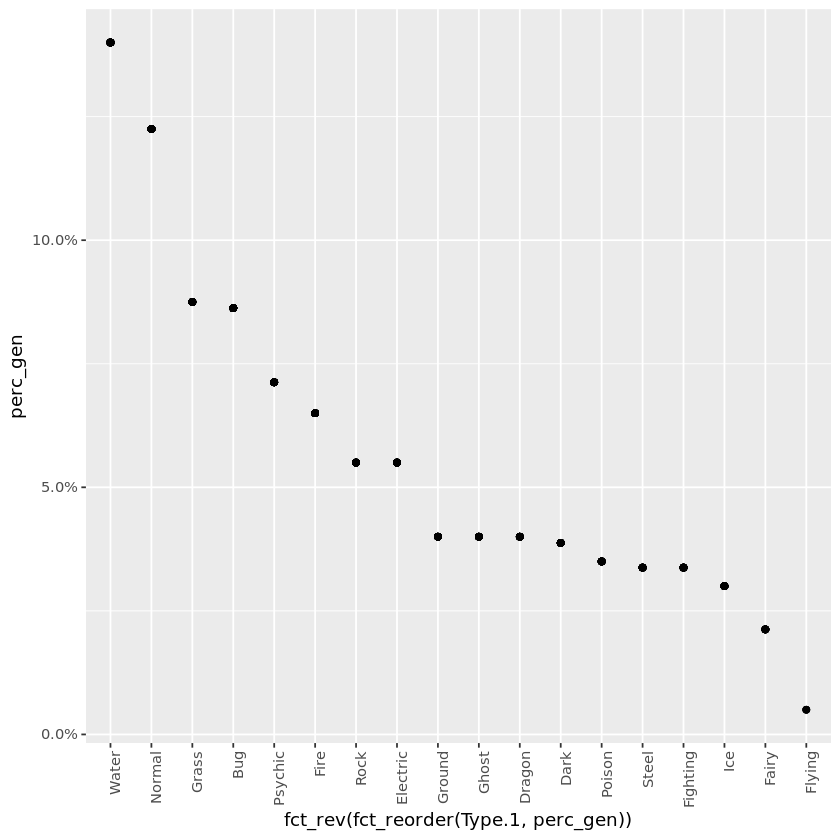

In [89]:
df %>%
add_count(Type.1) %>%
add_count()%>%
mutate(perc_gen = n/nn) %>%
ggplot(aes(x = fct_rev(fct_reorder(Type.1, perc_gen)), y=perc_gen)) +
geom_point()+
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_y_continuous(labels = scales::percent_format())

In [94]:
df %>%
mutate(Total_c = case_when(Total < 350 ~ "weak", 
          Total < 500 ~ "medium", 
          between(Total, 500, 700) ~ "strong", 
          TRUE ~ "extreme" )) %>%
head()

Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Total_c
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,weak
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,medium
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,strong
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,strong
Charmander,Fire,,309,39,52,43,60,50,65,1,False,weak
Charmeleon,Fire,,405,58,64,58,80,65,80,1,False,medium


In [95]:
df %>%
select(Name, HP, Attack, Defense, Speed) %>%
gather(Nom, Stat, -Name)%>%
head()

Name,Nom,Stat
Bulbasaur,HP,45
Ivysaur,HP,60
Venusaur,HP,80
VenusaurMega Venusaur,HP,80
Charmander,HP,39
Charmeleon,HP,58


In [96]:
str_detect("Hello Ben", "B*")

[1] TRUE

# Tidyverse

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.0     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
df <- df %>% mutate_if(is.character, as.factor)
df %>% summarize_if(is.factor, nlevels)

Name,Type.1,Type.2,Legendary
800,18,19,2


In [ ]:
df <- tidyr::who

In [ ]:
dim(who)

In [ ]:
who1 <- who %>% 
    gather(new_sp_m014:newrel_f65, key = "key", value = "cases", na.rm = TRUE)
head(who1)

In [ ]:
who1 %>% 
  count(key) %>%
head()

In [ ]:
who2 <- who1 %>% 
  mutate(key = stringr::str_replace(key, "newrel", "new_rel")) %>% # minor fix
    separate(key, c("new", "type", "sexage"), sep = "_")
head(who2)

In [ ]:
who3 <- who2 %>% 
  select(-new, -iso2, -iso3)
head(who3)

In [ ]:
tidy <- who3 %>% 
  separate(sexage, c("sex", "age"), sep = 1)
head(tidy)

In [ ]:
library('dplyr')

In [ ]:
df = read.csv("table1.csv", sep=";", stringsAsFactors=F)
dim(df)
head(df)

In [ ]:
summary(df)

In [ ]:
df[df=="?"] <- NA

In [ ]:
str(df)

In [ ]:
df$TASK_TIME <- as.numeric(df$TASK_TIME)

In [ ]:
plot(df$Attack, df$Defense,
    xlab = "Attack", ylab = "Defense", main = "Scatter plot")

hist(df$Attack, 
    main = "Histograms")

boxplot(Attack ~ Generation, data=df,
       xlab = "Generation", ylab = "Attack", main = "Boxplots")

barplot(table(df$Generation), 
        col = "red",
       xlab = "Generation", ylab = "Count", main = "Barplot")

In [ ]:
X <- df %>% select_if(is.numeric)

cor(X) %>%
    as_tibble(rownames = "variable") %>%
  select(variable, Generation) %>%
  filter(abs(Generation) > 0.05)

In [ ]:
library(tidyr)
x <- c(NA, 5, 6)
replace_na(x,2)

## dplyr

In [12]:
df <- df %>%
mutate_if(is.character, as.factor) 

In [13]:
df %>% 
summarize_if(is.factor, nlevels)

Name,Type.1,Type.2,Legendary
800,18,19,2


## reshape2

In [23]:
library(reshape2)

In [18]:
meltdf <- melt(df,
    id=c("Name", "Type.1", "Type.2", "Generation", "Legendary"),
    measure.vars=c("HP", "Attack"))
head(meltdf)

Name,Type.1,Type.2,Generation,Legendary,variable,value
Bulbasaur,Grass,Poison,1,False,HP,45
Ivysaur,Grass,Poison,1,False,HP,60
Venusaur,Grass,Poison,1,False,HP,80
VenusaurMega Venusaur,Grass,Poison,1,False,HP,80
Charmander,Fire,,1,False,HP,39
Charmeleon,Fire,,1,False,HP,58


In [19]:
dcast(meltdf, Generation ~ variable, mean)

Generation,HP,Attack
1,65.81928,76.63855
2,71.20755,72.02830
3,66.54375,81.62500
4,73.08264,82.86777
5,71.78788,82.06667
6,68.26829,75.80488


In [ ]:
## reshape2

library(reshape2)

meltdf <- melt(df,
    id=c("Name", "Type.1", "Type.2", "Generation", "Legendary"),
    measure.vars=c("HP", "Attack"))
head(meltdf)

dcast(meltdf, Generation ~ variable, mean)

## forcats

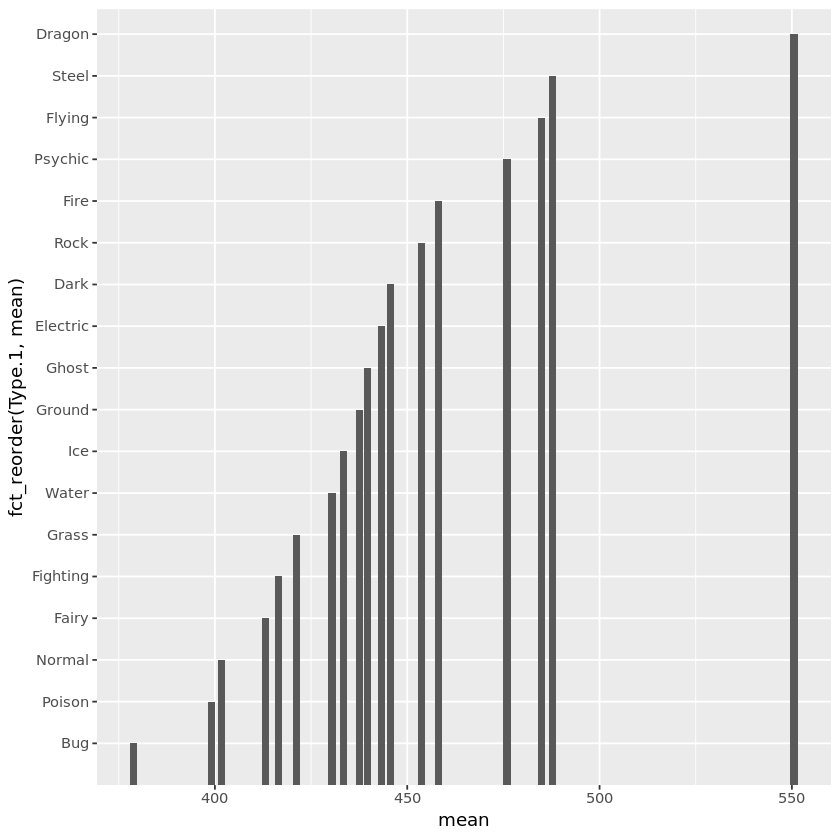

In [15]:
df %>%
group_by(Type.1) %>%
summarize(mean = mean(Total)) %>%
ggplot(aes(y = fct_reorder(Type.1, mean), x = mean)) + geom_col()

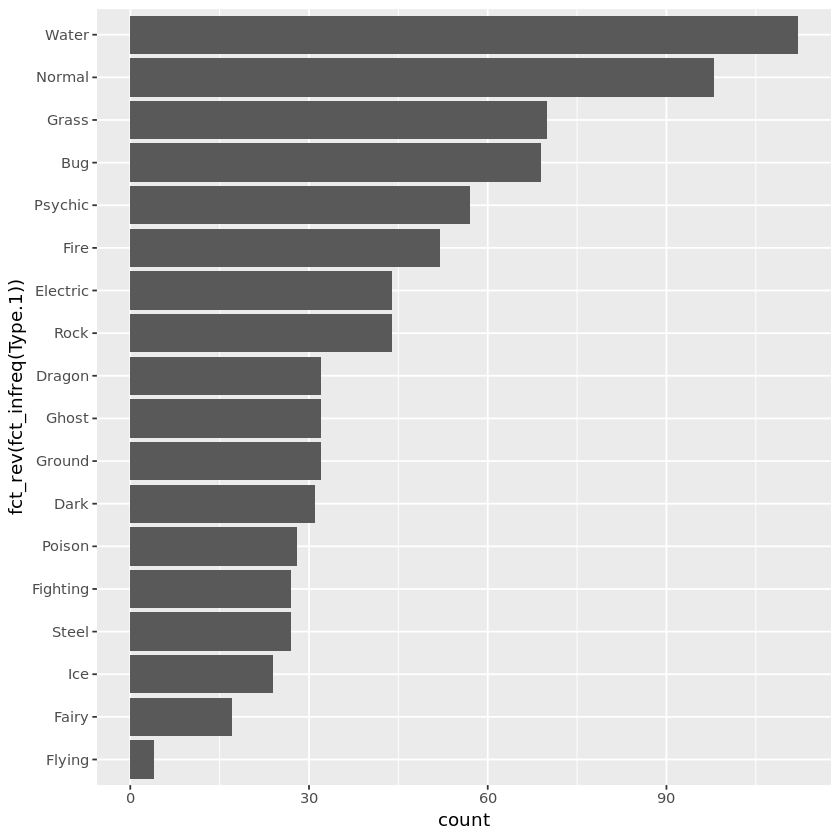

In [19]:
ggplot(df) + 
    geom_bar(aes(x = fct_rev(fct_infreq(Type.1))))+
    coord_flip()